In [2]:

# Load the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("ENB2012_data.csv")

# check shape and first rows
print(df.shape)
df.head()


(768, 10)


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [3]:
# Rename the Columns
df.columns = [
    'Relative Compactness','Surface Area','Wall Area','Roof Area',
    'Overall Height','Orientation','Glazing Area','Glazing Area Distribution',
    'Heating Load','Cooling Load'
]
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       768 non-null    float64
 1   Surface Area               768 non-null    float64
 2   Wall Area                  768 non-null    float64
 3   Roof Area                  768 non-null    float64
 4   Overall Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing Area               768 non-null    float64
 7   Glazing Area Distribution  768 non-null    int64  
 8   Heating Load               768 non-null    float64
 9   Cooling Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [4]:
# check the missing values
df.isna().sum()

Relative Compactness         0
Surface Area                 0
Wall Area                    0
Roof Area                    0
Overall Height               0
Orientation                  0
Glazing Area                 0
Glazing Area Distribution    0
Heating Load                 0
Cooling Load                 0
dtype: int64

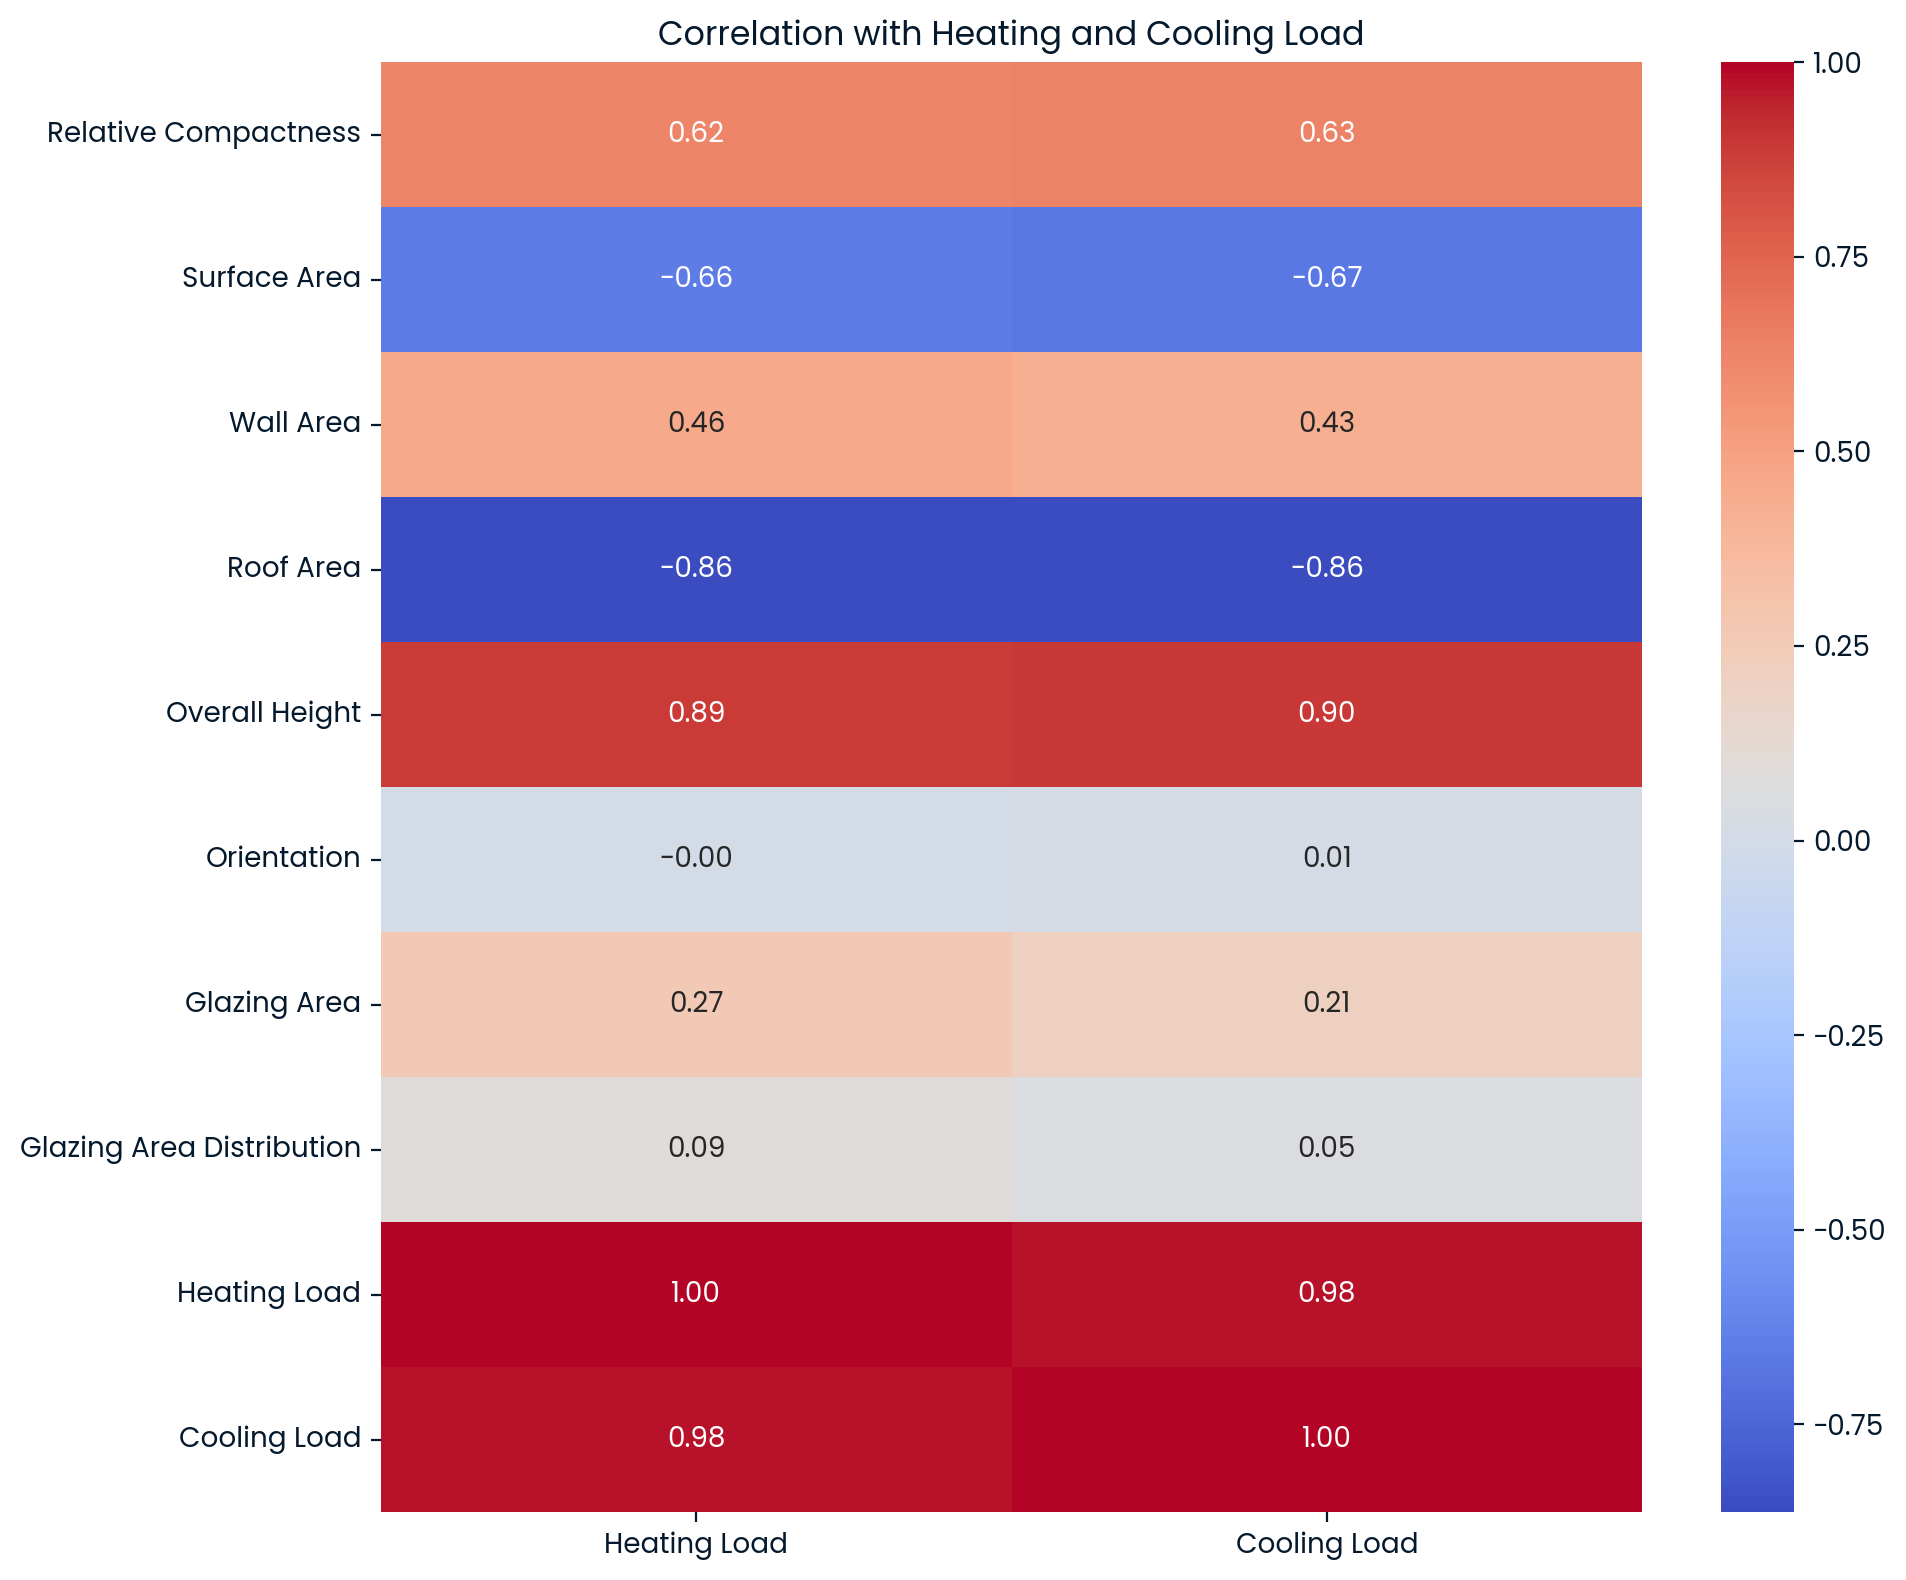

In [5]:
# Correlation heatmap for Heating and Cooling Load and save as image
plt.figure(figsize=(10,8))
corr = df.corr()
ax = sns.heatmap(
    corr[["Heating Load", "Cooling Load"]].loc[
        ["Relative Compactness", "Surface Area", "Wall Area", "Roof Area", "Overall Height", "Orientation", "Glazing Area", "Glazing Area Distribution", "Heating Load", "Cooling Load"]
    ],
    annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation with Heating and Cooling Load")
plt.tight_layout()
plt.savefig("correlation_heatmap.png", dpi=300)
plt.show()

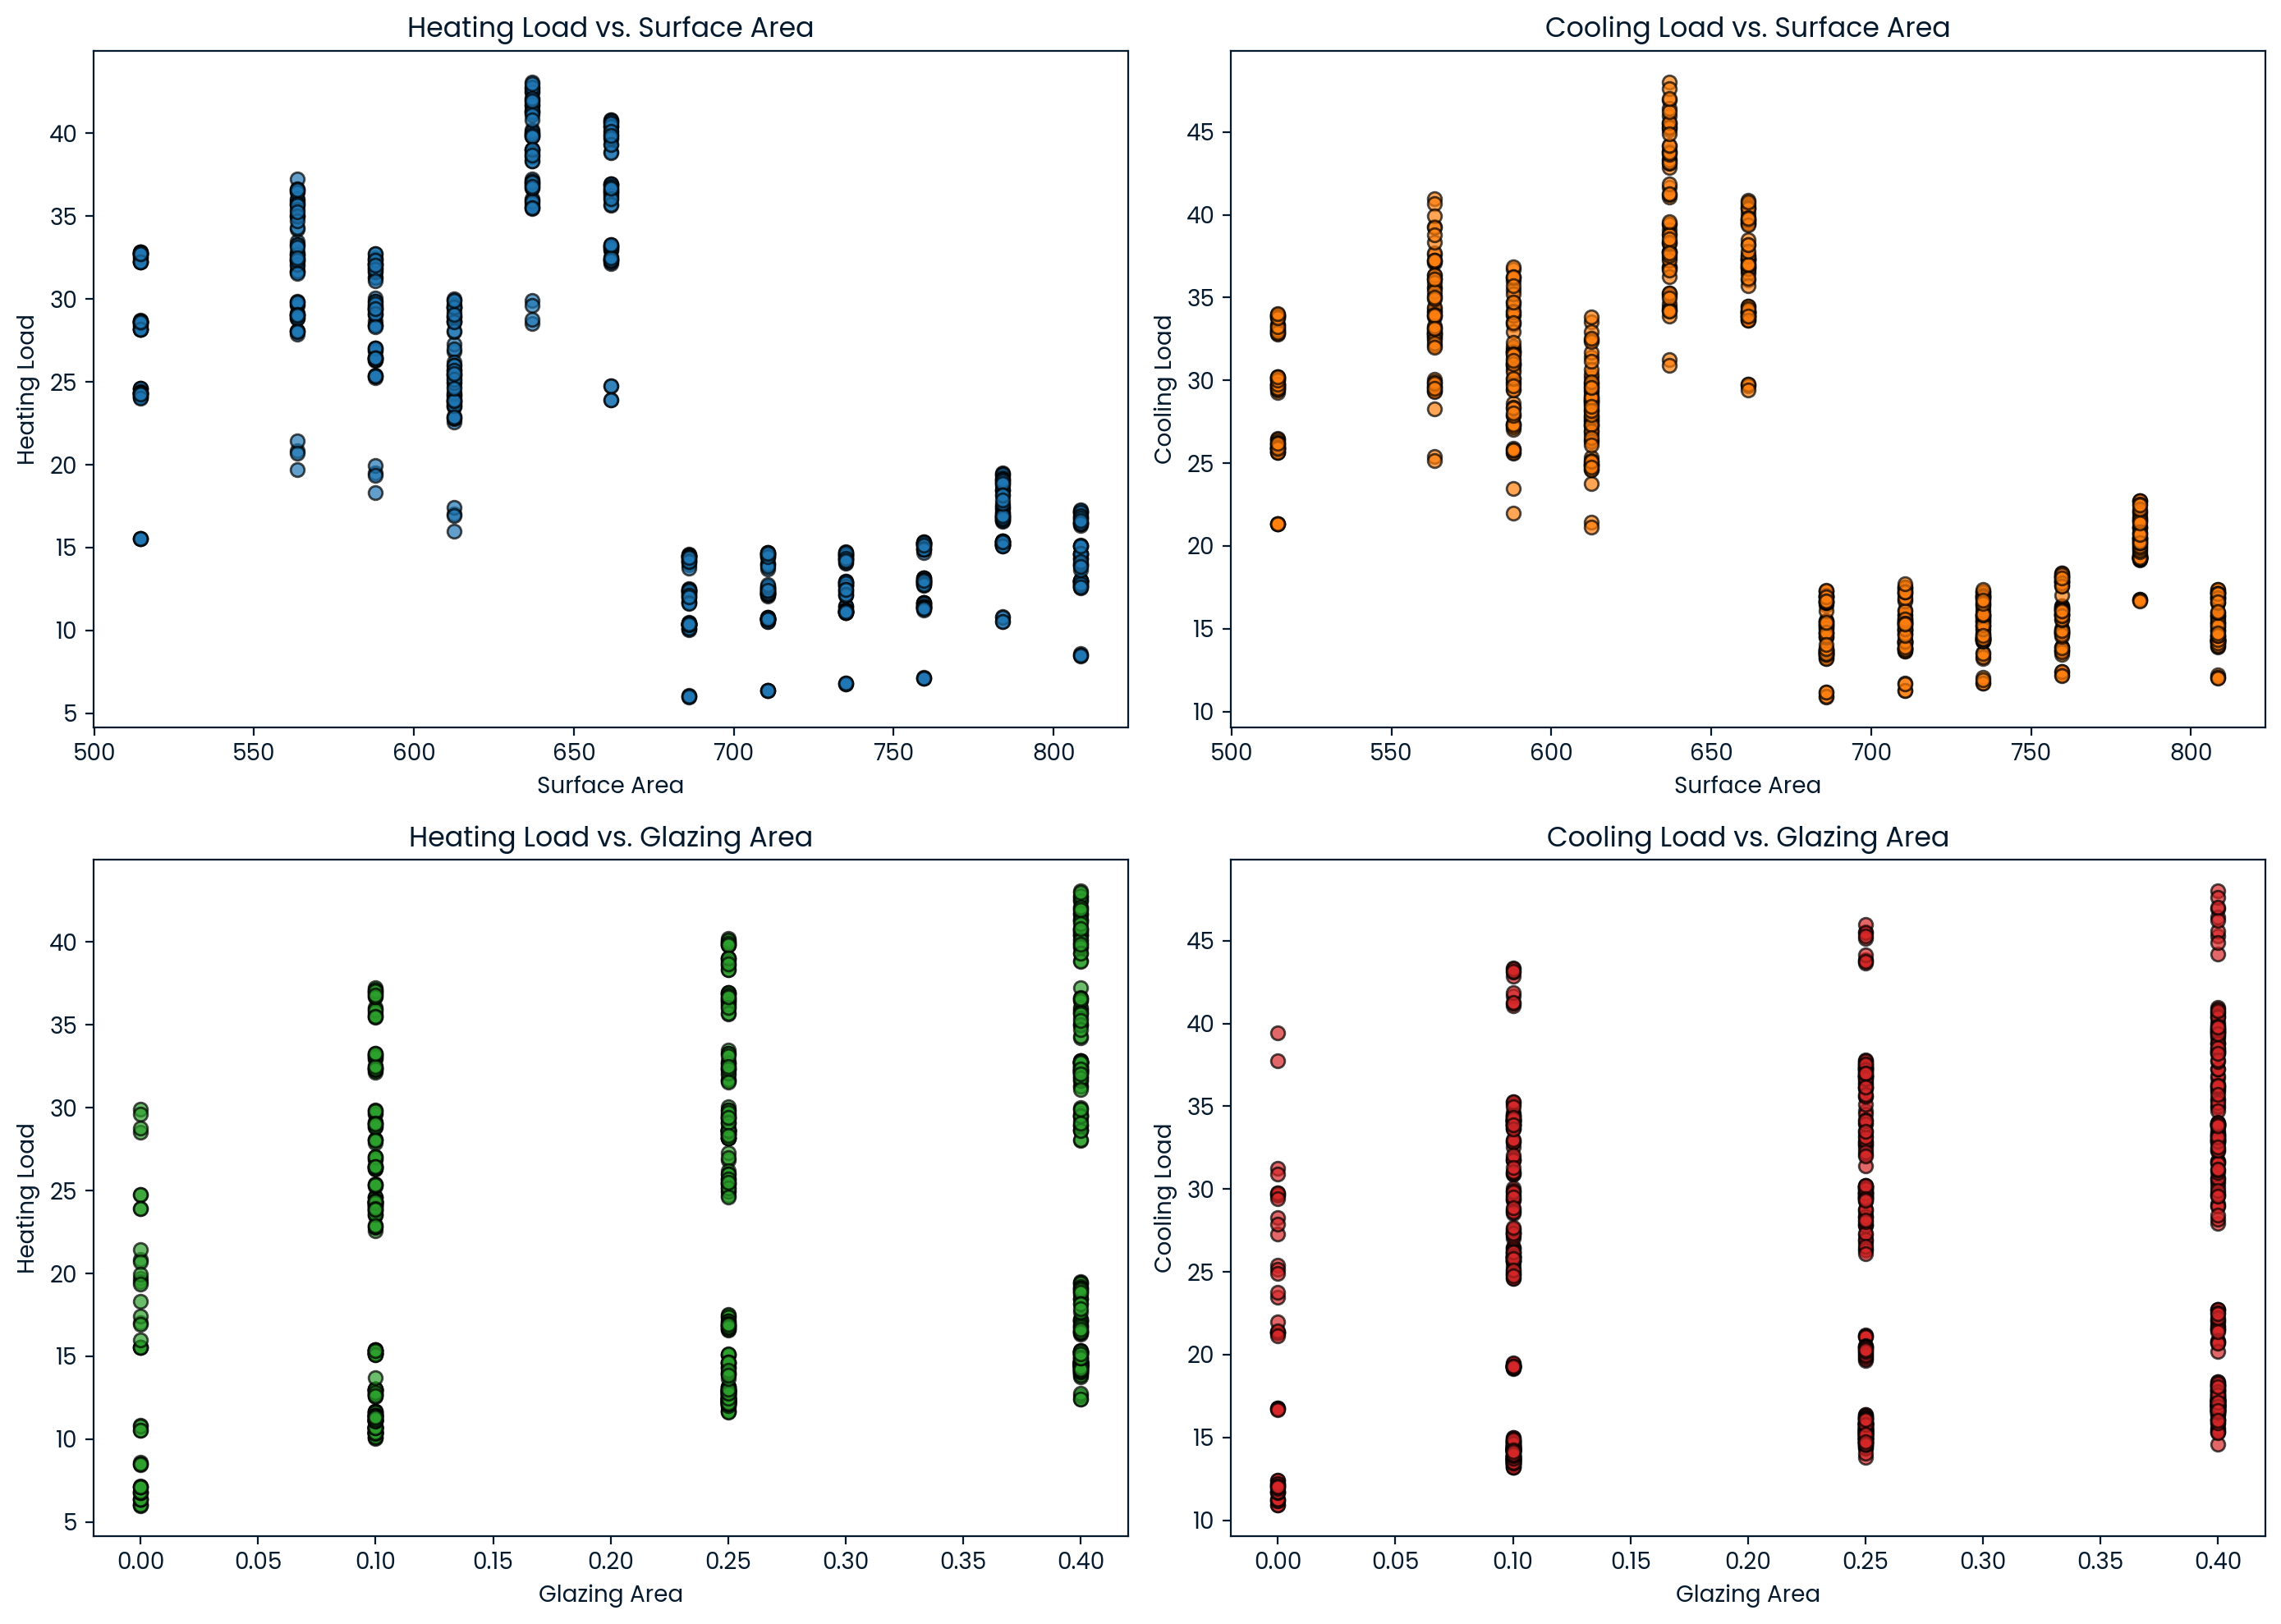

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Heating Load vs. Surface Area
axes[0, 0].scatter(df['Surface Area'], df['Heating Load'], alpha=0.7, edgecolor='k', color='tab:blue')
axes[0, 0].set_xlabel('Surface Area')
axes[0, 0].set_ylabel('Heating Load')
axes[0, 0].set_title('Heating Load vs. Surface Area')

# Cooling Load vs. Surface Area
axes[0, 1].scatter(df['Surface Area'], df['Cooling Load'], alpha=0.7, edgecolor='k', color='tab:orange')
axes[0, 1].set_xlabel('Surface Area')
axes[0, 1].set_ylabel('Cooling Load')
axes[0, 1].set_title('Cooling Load vs. Surface Area')

# Heating Load vs. Glazing Area
axes[1, 0].scatter(df['Glazing Area'], df['Heating Load'], alpha=0.7, edgecolor='k', color='tab:green')
axes[1, 0].set_xlabel('Glazing Area')
axes[1, 0].set_ylabel('Heating Load')
axes[1, 0].set_title('Heating Load vs. Glazing Area')

# Cooling Load vs. Glazing Area
axes[1, 1].scatter(df['Glazing Area'], df['Cooling Load'], alpha=0.7, edgecolor='k', color='tab:red')
axes[1, 1].set_xlabel('Glazing Area')
axes[1, 1].set_ylabel('Cooling Load')
axes[1, 1].set_title('Cooling Load vs. Glazing Area')

plt.tight_layout()

# Save the figure as an image file
fig.savefig("heating_cooling_scatterplots.png", dpi=300)

plt.show()

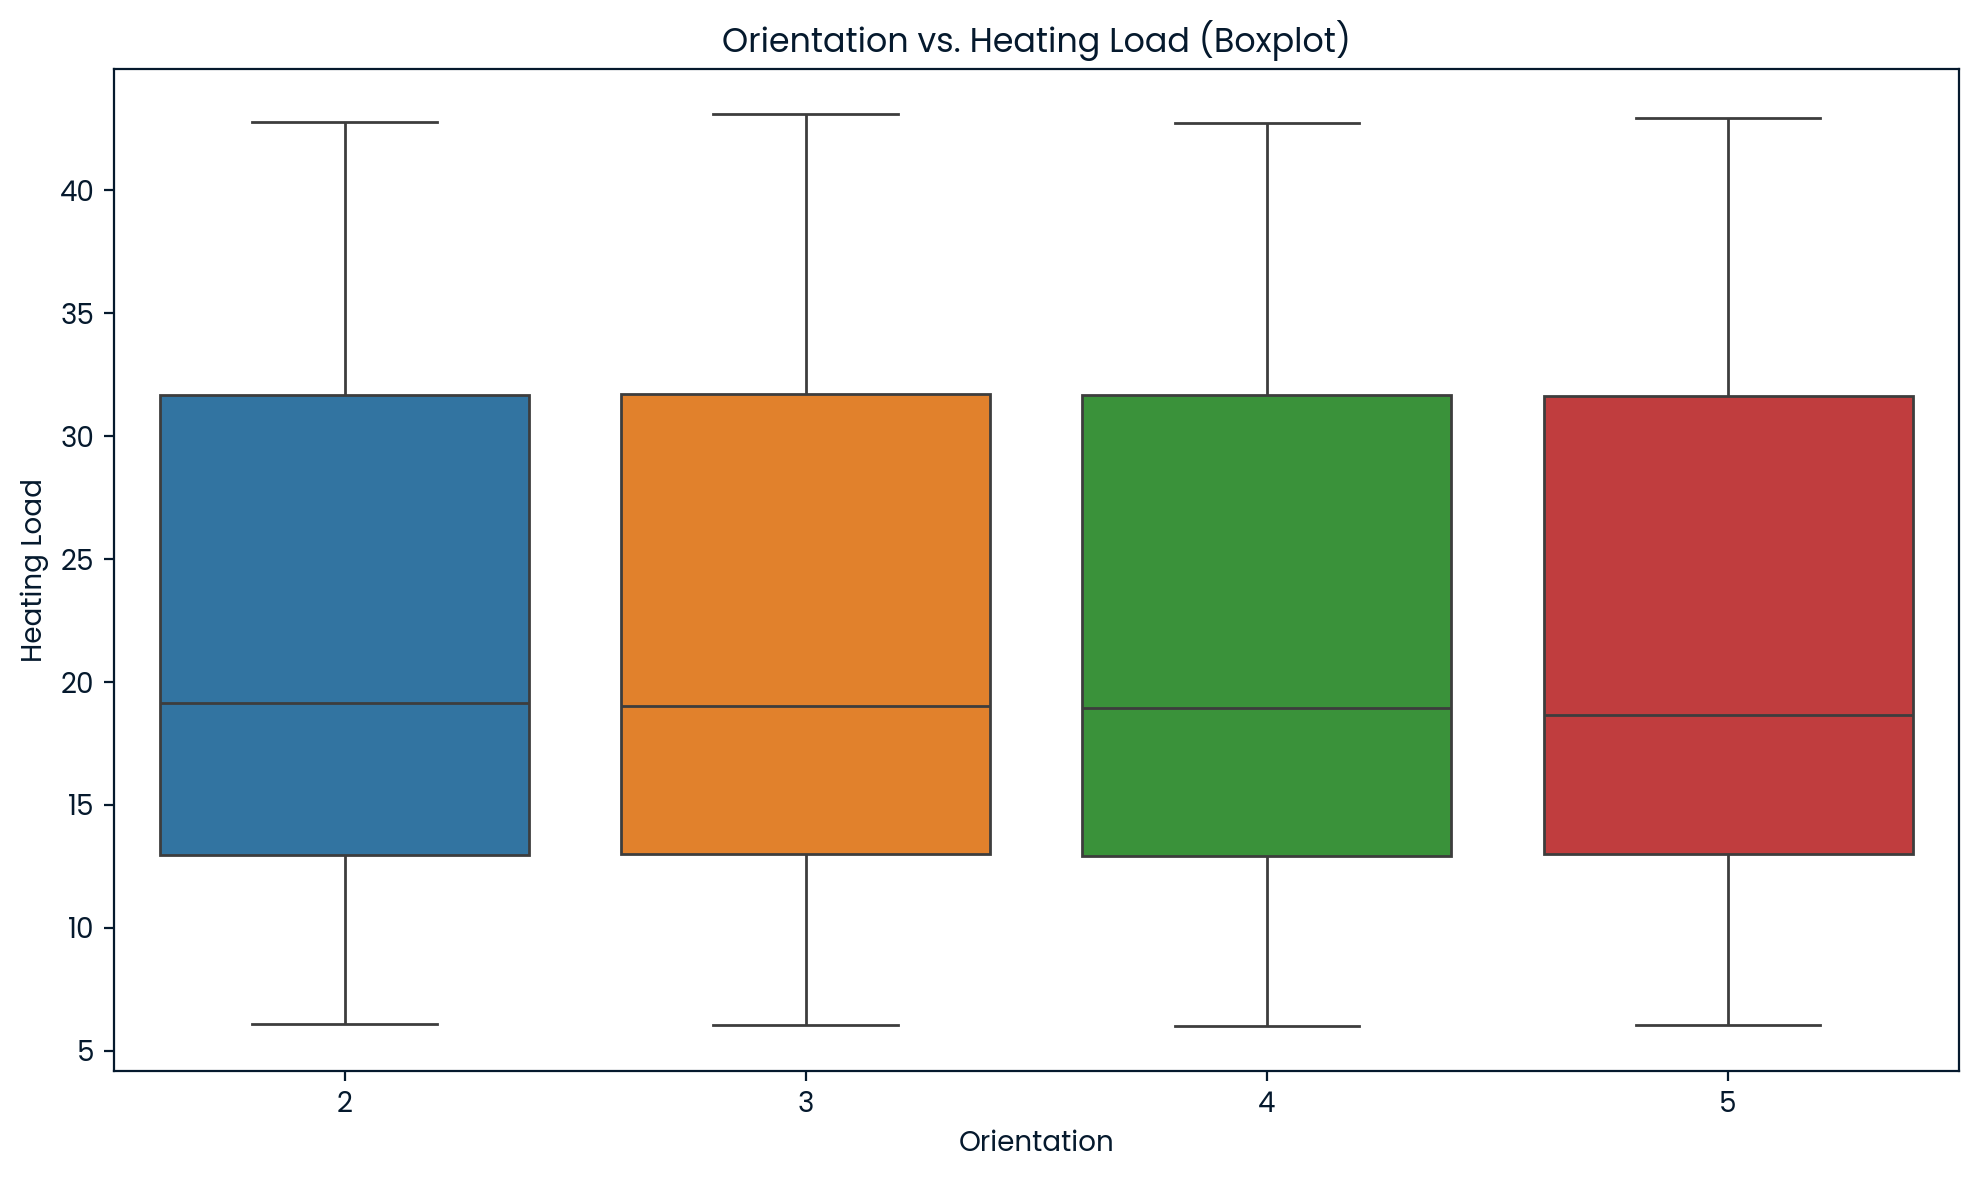

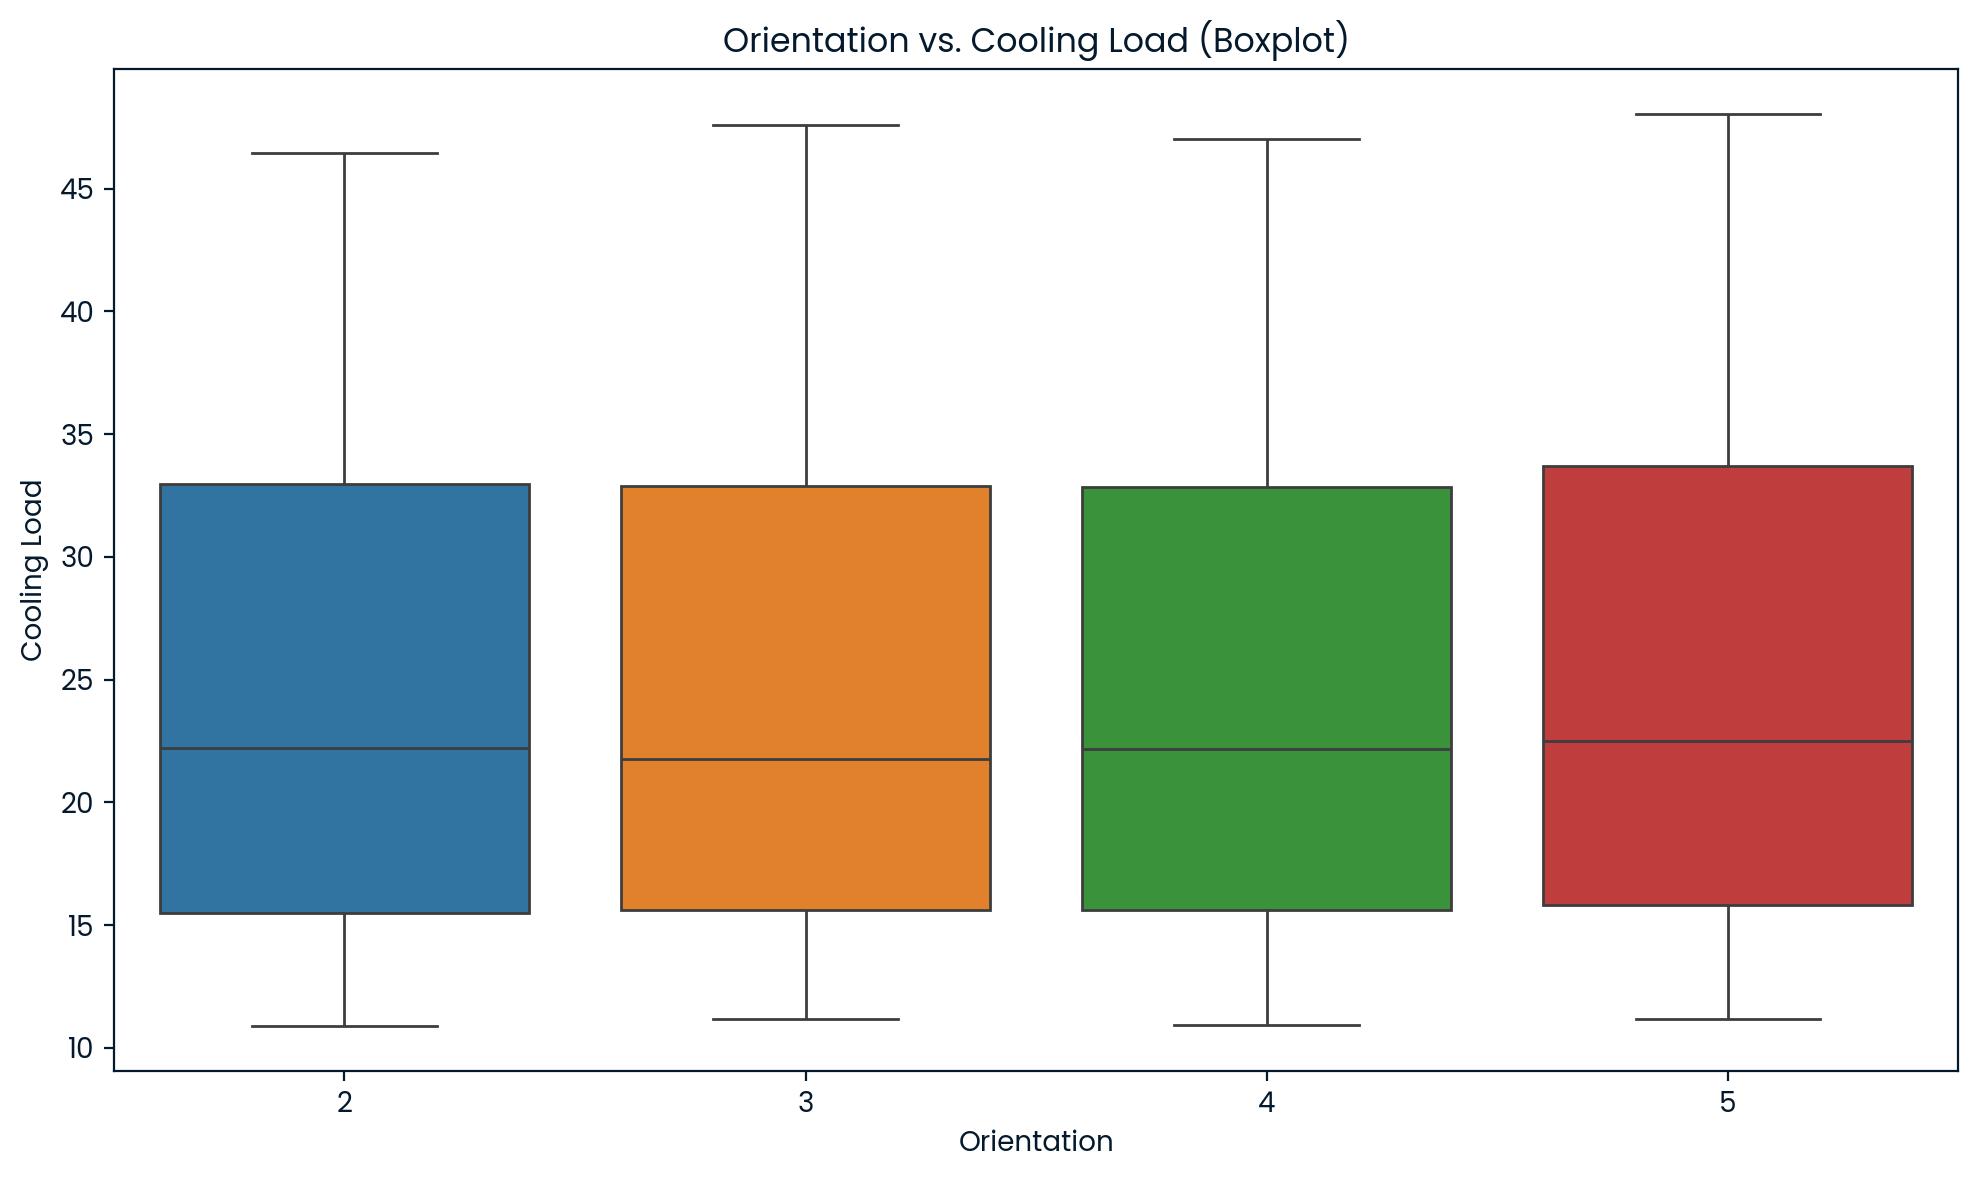

In [10]:
# Box plot: Orientation vs. Heating Load
plt.figure(figsize=(10, 6))
sns.boxplot(x='Orientation', y='Heating Load', data=df, palette='tab10')
plt.xlabel('Orientation')
plt.ylabel('Heating Load')
plt.title('Orientation vs. Heating Load (Boxplot)')
plt.tight_layout()
plt.savefig("orientation_vs_heating_load_boxplot.png", dpi=300)
plt.show()

# Box plot: Orientation vs. Cooling Load
plt.figure(figsize=(10, 6))
sns.boxplot(x='Orientation', y='Cooling Load', data=df, palette='tab10')
plt.xlabel('Orientation')
plt.ylabel('Cooling Load')
plt.title('Orientation vs. Cooling Load (Boxplot)')
plt.tight_layout()
plt.savefig("orientation_vs_cooling_load_boxplot.png", dpi=300)
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Features (X) ve Targets (y)
X = df.iloc[:, :8]
y = df[['Heating Load','Cooling Load']]

# Numeric and Categorical columns 
numeric_features = ['Relative Compactness','Surface Area','Wall Area','Roof Area',
                    'Overall Height','Glazing Area']
categorical_features = ['Orientation','Glazing Area Distribution']

# pipeline
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# Train / Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)


Train shape: (614, 8) Test shape: (154, 8)


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
import pandas as pd

# Linear Regression pipeline
pipe_lr = Pipeline([
    ('pre', preprocessor),  # preprocessor: Part 1'de tanımladık
    ('model', MultiOutputRegressor(LinearRegression()))
])

# Random Forest pipeline
pipe_rf = Pipeline([
    ('pre', preprocessor),
    ('model', MultiOutputRegressor(RandomForestRegressor(
        n_estimators=200, random_state=42, n_jobs=-1)))
])

# Train both models
pipe_lr.fit(X_train, y_train)
pipe_rf.fit(X_train, y_train)

# Predict
y_pred_lr = pipe_lr.predict(X_test)
y_pred_rf = pipe_rf.predict(X_test)

# Evaluation function
def evaluate_model(name, y_test, y_pred):
    print(f"\n=== {name} ===")
    for i, col in enumerate(y_test.columns):
        rmse = mean_squared_error(y_test.iloc[:,i], y_pred[:,i], squared=False)
        r2 = r2_score(y_test.iloc[:,i], y_pred[:,i])
        print(f"{col}: RMSE={rmse:.2f}, R²={r2:.3f}")

# Compare models
evaluate_model("Linear Regression", y_test, y_pred_lr)
evaluate_model("Random Forest", y_test, y_pred_rf)

rf_heat = Pipeline([
    ('pre', preprocessor),
    ('model', RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1))
])
rf_cool = Pipeline([
    ('pre', preprocessor),
    ('model', RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1))
])

rf_heat.fit(X_train, y_train['Heating Load'])
rf_cool.fit(X_train, y_train['Cooling Load'])

# Helper: get feature names from ColumnTransformer
def get_feature_names(column_transformer):
    feature_names = []
    for name, transformer, cols in column_transformer.transformers_:
        if name == 'remainder':
            continue
        if hasattr(transformer, 'get_feature_names_out'):
            feature_names += list(transformer.get_feature_names_out(cols))
        else:
            feature_names += cols
    return feature_names

feat_names = get_feature_names(preprocessor)

# Heating Load feature importances
imp_heat = pd.DataFrame({
    'Feature': feat_names,
    'Importance': rf_heat.named_steps['model'].feature_importances_
}).sort_values('Importance', ascending=False)

# Cooling Load feature importances
imp_cool = pd.DataFrame({
    'Feature': feat_names,
    'Importance': rf_cool.named_steps['model'].feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop features for Heating Load:")
display(imp_heat.head(5))

print("\nTop features for Cooling Load:")
display(imp_cool.head(5))



=== Linear Regression ===
Heating Load: RMSE=2.88, R²=0.920
Cooling Load: RMSE=3.13, R²=0.895

=== Random Forest ===
Heating Load: RMSE=0.53, R²=0.997
Cooling Load: RMSE=2.03, R²=0.955

Top features for Heating Load:


,Feature,Importance
0,Relative Compactness,0.400879
1,Surface Area,0.206423
3,Roof Area,0.131965
4,Overall Height,0.126364
5,Glazing Area,0.076814



Top features for Cooling Load:


,Feature,Importance
0,Relative Compactness,0.361603
4,Overall Height,0.337235
1,Surface Area,0.103264
3,Roof Area,0.078947
5,Glazing Area,0.048347
